# following the study of the IMBD movies  dataset

# meta score
Scores are assigned to movie's reviews of large group of the world's most respected critics, and weighted average are applied to summarize their opinions range.

The result is shown in single number that captures the essence of critical opinion in one Metascore.

Movies will get a Metascore only if at least four critics's reviews are collected.

The higher the Metascore, the more positive reviews a movie has.



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [25]:
movd=pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
movd.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


movd.info()

In [4]:
movd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
movd.dropna(how='any',inplace=True)
movd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


# make copy of data 

In [6]:
movd_copy=movd.copy()

# delete columns that i dont need them

In [21]:
del movd['Description']

In [22]:
del movd['Actors']

In [23]:
del movd['Rank']

# ANALYSIS STATE

In [11]:
# General information of database
recent_director_movies = movd['Director'].value_counts()
recent_max_movie = recent_director_movies.max()

# Number of directors
recent_directors = len(movd['Director'].unique())

# Range of years
recent_max_year = movd['Year'].max()
recent_min_year = movd['Year'].min()

# Range of revenue
recent_min_revenue = movd['Revenue (Millions)'].min()
recent_max_revenue = movd['Revenue (Millions)'].max()

print(f'There are {recent_directors} directors, from {recent_min_year} to {recent_max_year}, Revenue (Millions) {recent_min_revenue} to {recent_max_revenue}, the maximum movies by a director is {recent_max_movie}')

movd.shape

There are 524 directors, from 2006 to 2016, Revenue (Millions) 0.0 to 936.63, the maximum movies by a director is 8


(838, 8)

In [12]:
#find the films that were produced in 2012
movd.query('Year==2012')


,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0
76,The Avengers,Joss Whedon,2012,143,8.1,1045588,623.28,69.0
124,The Dark Knight Rises,Christopher Nolan,2012,164,8.5,1222645,448.13,78.0
135,The Place Beyond the Pines,Derek Cianfrance,2012,140,7.3,200090,21.38,68.0
144,Django Unchained,Quentin Tarantino,2012,165,8.4,1039115,162.80,81.0
...,...,...,...,...,...,...,...,...
887,The Lucky One,Scott Hicks,2012,101,6.5,82874,60.44,39.0
916,The Expendables 2,Simon West,2012,103,6.6,257395,85.02,51.0
957,End of Watch,David Ayer,2012,109,7.7,192190,40.98,68.0
972,Rock of Ages,Adam Shankman,2012,123,5.9,64513,38.51,47.0


# gross_earn according to each year

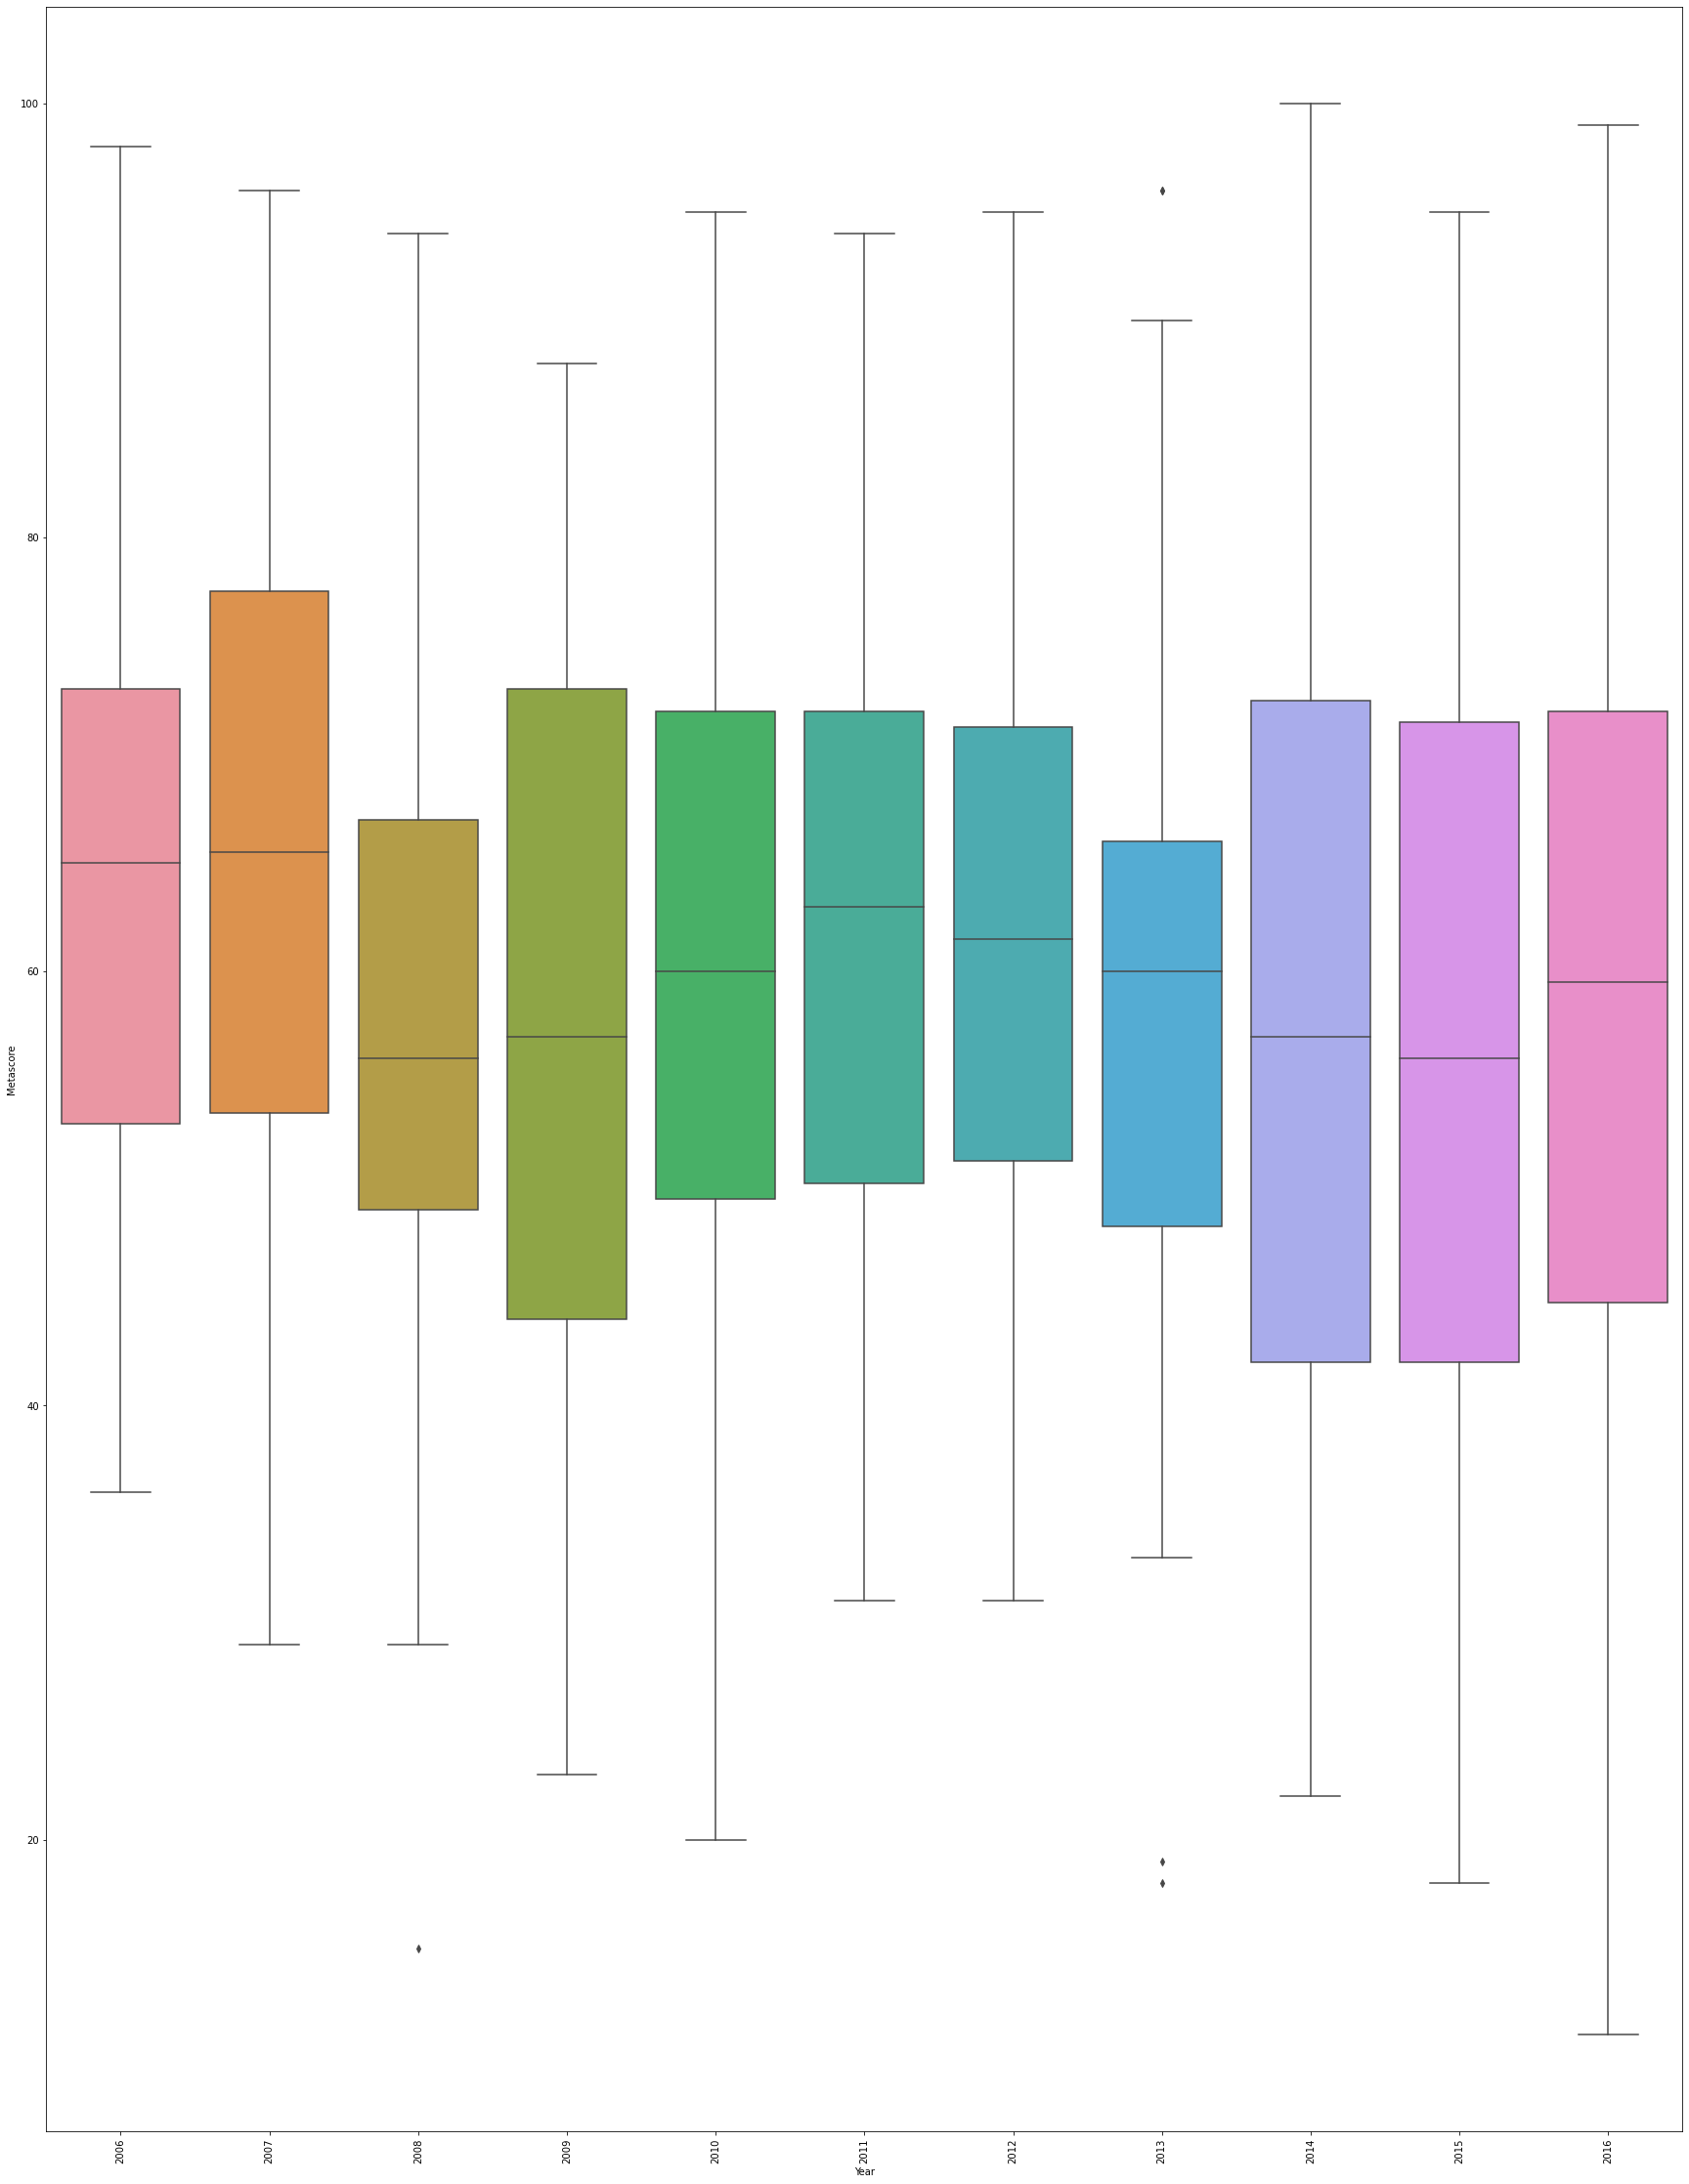

In [5]:
plt.figure(figsize=(30,40))
chart=sns.boxplot(x='Year',y='Metascore',data=movd)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);


In [4]:
#make group by director
directors=movd.groupby(['Director'])


In [6]:
# find the best movie according to maxmum metascore
mask=movd['Metascore']==movd['Metascore'].max()
movd[mask]['Title']

656    Boyhood
Name: Title, dtype: object

In [7]:
# find the max revenue for each film and for each director
movd.groupby(['Title','Director'])['Revenue (Millions)'].max()

Title                 Director        
(500) Days of Summer  Marc Webb            32.39
10 Cloverfield Lane   Dan Trachtenberg     71.90
10 Years              Jamie Linden          0.20
12 Years a Slave      Steve McQueen        56.67
127 Hours             Danny Boyle          18.33
                                           ...  
Zipper                Mora Stephens          NaN
Zodiac                David Fincher        33.05
Zombieland            Ruben Fleischer      75.59
Zoolander 2           Ben Stiller          28.84
Zootopia              Byron Howard        341.26
Name: Revenue (Millions), Length: 1000, dtype: float64

<AxesSubplot:xlabel='Runtime (Minutes)'>

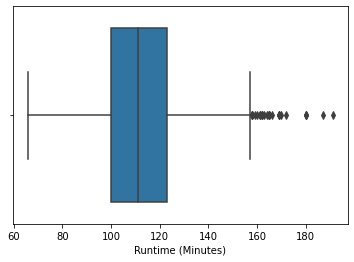

In [8]:
# we want to make anew column in our data set consist of 0 and 1 
#we can make abox plot to see the runtime cases to make along film 1 short film 0 and we wii name the colums 
#with duration_type
sns.boxplot(movd['Runtime (Minutes)'])

In [32]:

#greater than 120 long assign 1
#less than 120 short assign 0
def detect_time(n):
    if n>120:
        return(0)
    elif n<120:
        return(1)

In [33]:
movd['duration_type']=movd['Runtime (Minutes)'].apply(detect_time)
movd.head()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,duration_type
0,1,2014,121,8.1,757074,333.13,76.0,0.0
1,2,2012,124,7.0,485820,126.46,65.0,0.0
2,3,2016,117,7.3,157606,138.12,62.0,1.0
3,4,2016,108,7.2,60545,270.32,59.0,1.0
4,5,2016,123,6.2,393727,325.02,40.0,0.0


In [12]:
#find the top 10 movie that have maximum duration
movd.sort_values('Revenue (Millions)',ascending=False)['Runtime (Minutes)'].max()
movd.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,duration_type
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,0.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,0.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,1.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,0.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,1.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,0.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,1.0


In [13]:
#find each year that have  movies that have maximum votes
years=movd.groupby(['Year'])
years_list=list(movd.Year.unique())
for col in years_list:
    print(col)
    print(years.get_group(col).nlargest(2,'Votes')['Title'].values)

    

2014
['Interstellar' 'Guardians of the Galaxy']
2012
['The Dark Knight Rises' 'The Avengers']
2016
['Deadpool' 'Batman v Superman: Dawn of Justice']
2015
['Star Wars: Episode VII - The Force Awakens' 'Mad Max: Fury Road']
2007
['No Country for Old Men' 'I Am Legend']
2011
['Harry Potter and the Deathly Hallows: Part 2' 'Thor']
2008
['The Dark Knight' 'WALL·E']
2006
['The Departed' 'The Prestige']
2009
['Inglourious Basterds' 'Avatar']
2010
['Inception' 'Shutter Island']
2013
['The Wolf of Wall Street' 'Gravity']


# show data about genre to make spliting for genre column

In [3]:
movd['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object


 in this data frame there is column that is called genre that column hold each type of the movie we must calssify each movie according to each type to facilate to the audience we are going to obtain frequency distribution of film genre tags by certificate type. First, we are going to find out all unique genres in the dataset , and how many times each of them is met.

In [14]:
l=list(movd['Genre'].str.split(','))
genres=[]
for i in l:
    for n in i:
        genres.append(n)
genres_unique = np.unique([genre for genre in genres])
genres_count = {genre: genres.count(genre) for genre in genres}


print(pd.DataFrame.from_dict(genres_count, orient='index', columns=['Freq']).sort_values('Freq', ascending=False))
print('-'*30)
print('Total number of genres is ', len(genres_unique))

           Freq
Drama       513
Action      303
Comedy      279
Adventure   259
Thriller    195
Crime       150
Romance     141
Sci-Fi      120
Horror      119
Mystery     106
Fantasy     101
Biography    81
Family       51
Animation    49
History      29
Sport        18
Music        16
War          13
Western       7
Musical       5
------------------------------
Total number of genres is  20


# visulization

<AxesSubplot:ylabel='Frequency'>

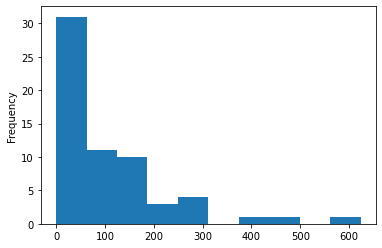

In [14]:
movd.query('Year==2012')['Revenue (Millions)'].plot.hist()

In [21]:
max_movie_di_ti=movd.groupby(['Title','Director'])['Revenue (Millions)'].max()

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

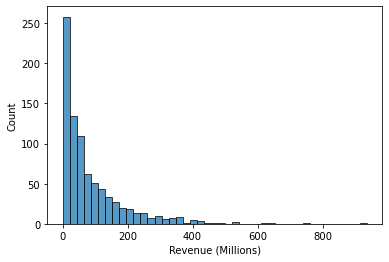

In [24]:
sns.histplot(max_movie_di_ti)
prefer runtime types year 

In [25]:
# here i want to know continues and discrete columns
movd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   Runtime (Minutes)   1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Votes               1000 non-null   int64  
 7   Revenue (Millions)  872 non-null    float64
 8   Metascore           936 non-null    float64
 9   duration_type       981 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 78.2+ KB


## univariante 

# numerical data

In [25]:
movd.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [16]:
#make list for continues columns
continues_list=list(movd.describe())

Rank


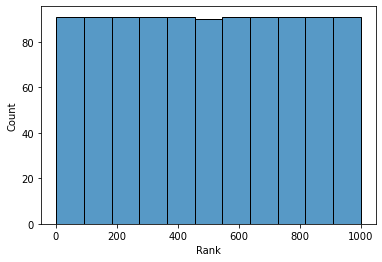

Year


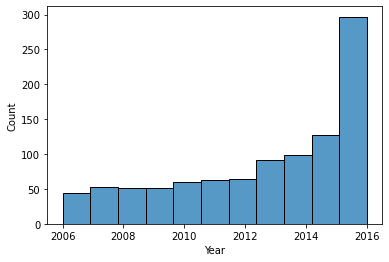

Runtime (Minutes)


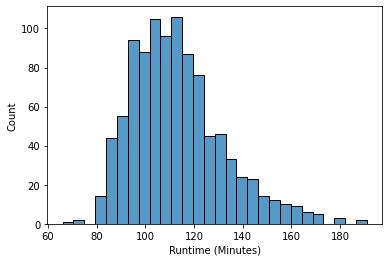

Rating


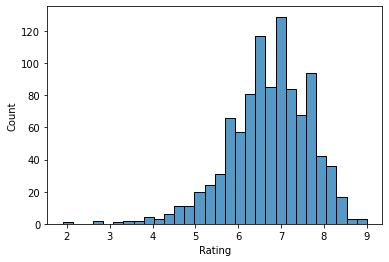

Votes


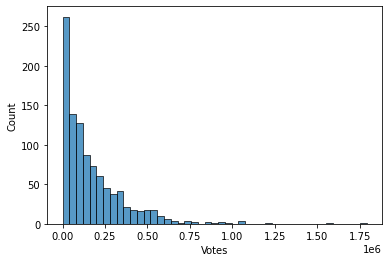

Revenue (Millions)


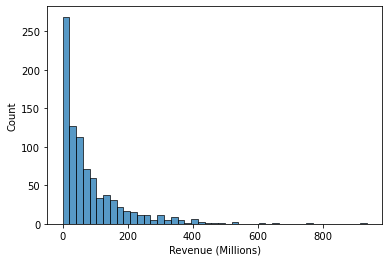

Metascore


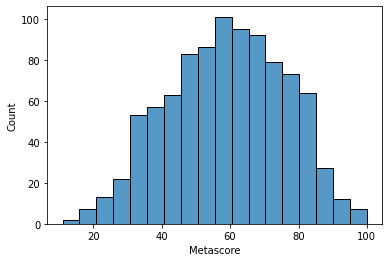

duration_type


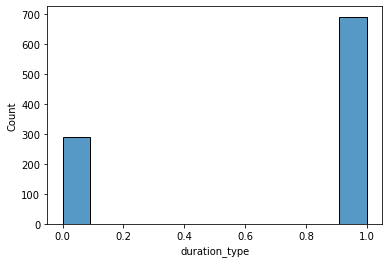

In [17]:
# here i want to make hist plot for all continues data columns
for i in continues_list:
    print(i)
    sns.histplot(movd[i])
    plt.show()

Rank


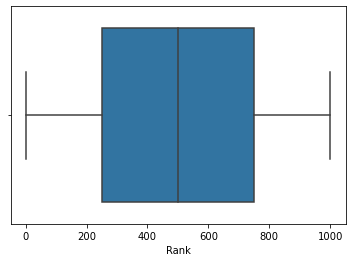

Year


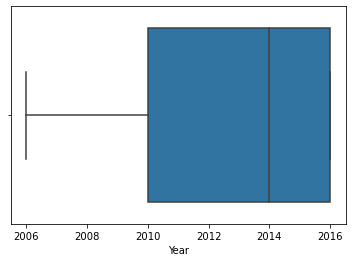

Runtime (Minutes)


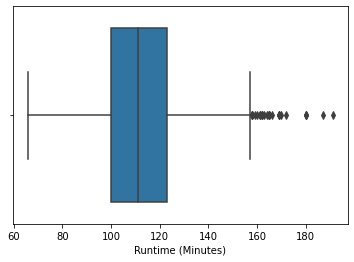

Rating


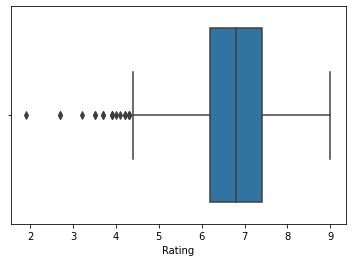

Votes


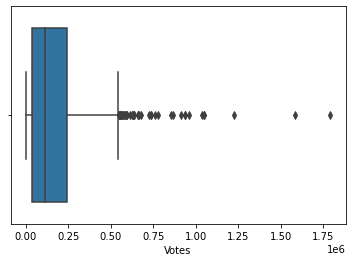

Revenue (Millions)


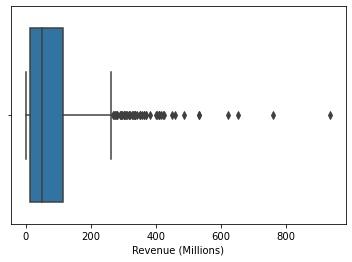

Metascore


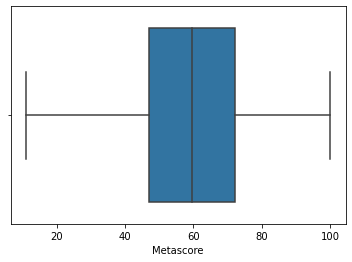

duration_type


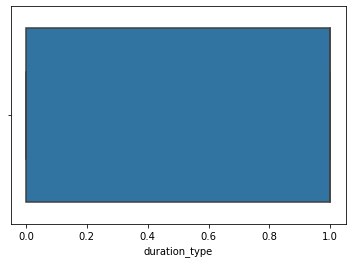

In [18]:
#make box plot also for all continues data columns
for i in continues_list:
    print(i)
    sns.boxplot(movd[i])
    plt.show()

In [ ]:
#according to year there were no outliers
#according to runtime there were  outliers >180
# according to rating there were outliers<4
#according to votes there were outliers>125
#according to revenue there were outliers>800
#according to metascore there were no outliers and so on for duration_type

# bivariante analysis:

# categorical data

In [15]:
movd.describe(include='O')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


In [24]:
#make columns for discrete data columns
categorical_list=list(movd.describe(include='O'))
categorical_list

['Title', 'Genre', 'Director']

In [ ]:
#find the count of tiltles according to each year

<AxesSubplot:xlabel='Year', ylabel='Count'>

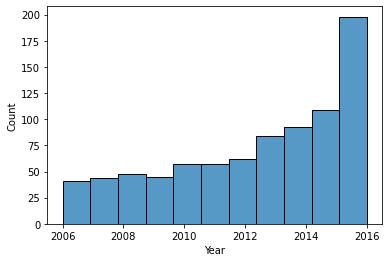

In [29]:
sns.histplot(x=movd['Year'])

<AxesSubplot:ylabel='Frequency'>

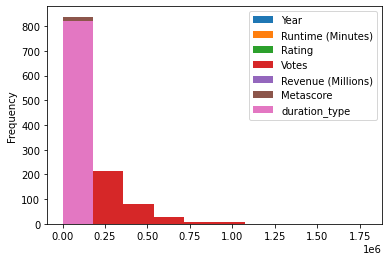

In [31]:
# make visylization for all data columns
movd.plot.hist()

<AxesSubplot:ylabel='Frequency'>

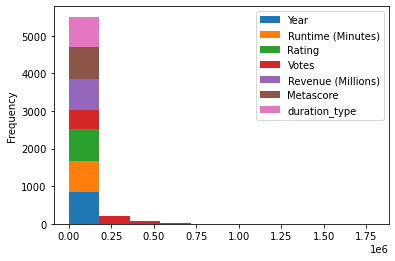

In [34]:
movd.plot.hist(stacked=True)

<AxesSubplot:>

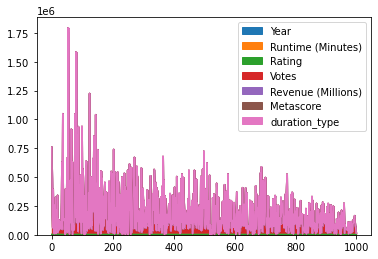

In [35]:
movd.plot.area()

<AxesSubplot:>

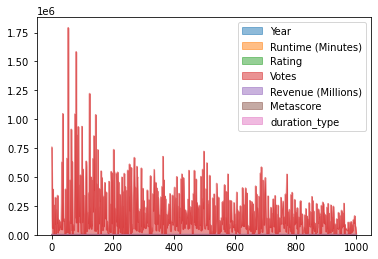

In [36]:
movd.plot.area(stacked=False)

<AxesSubplot:xlabel='Year', ylabel='Rating'>

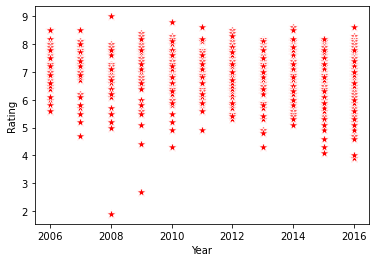

In [37]:
sns.scatterplot(x=movd['Year'],y=movd['Rating'],marker='*',color='red',s=100)

In [38]:
movd.corr()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,duration_type
Year,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303,0.061044
Runtime (Minutes),-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397,-0.807108
Rating,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731,-0.311692
Votes,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674,-0.339320
Revenue (Millions),-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397,-0.284221
Metascore,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000,-0.224765
duration_type,0.061044,-0.807108,-0.311692,-0.339320,-0.284221,-0.224765,1.000000


<AxesSubplot:>

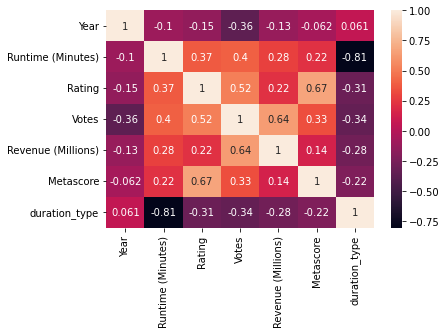

In [39]:
sns.heatmap(movd.corr(),annot=True)

In [40]:
#find the standard diviation for the rating
movd['Rating'].std()

0.8777538418027501

In [41]:
#here to improve that standard =square root for the variance
import numpy as np
np.sqrt(movd['Rating'].var())

0.8777538418027501

Text(0.5, 1.0, 'types of films')

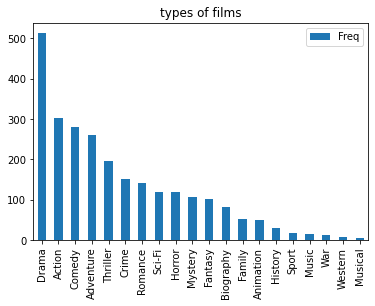

In [60]:
# make aplot bar for all gernres and thier counts 
#drama genre is the most genre that have the maximum number  
films_type=pd.DataFrame.from_dict(genres_count, orient='index', columns=['Freq']).sort_values('Freq', ascending=False)
films_type.plot.bar()
plt.title('types of films')

In [ ]:
# that was avisulization for number of films according to spescefic type

In [8]:
movd.to_csv('imdb2.csv')

# machine learning

In [35]:
movd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Year                838 non-null    int64  
 2   Runtime (Minutes)   838 non-null    int64  
 3   Rating              838 non-null    float64
 4   Votes               838 non-null    int64  
 5   Revenue (Millions)  838 non-null    float64
 6   Metascore           838 non-null    float64
 7   duration_type       819 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 91.2+ KB


In [36]:
del movd['Title'],movd['Genre'],movd['Description'],movd['Director'],movd['Actors']
 
    

KeyError: 'Title'

In [60]:
movd.dropna(how='any',inplace=True)  

In [61]:
movd.isnull().sum()

Rank                  0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
duration_type         0
dtype: int64

In [62]:
movd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,819.0,484.356532,285.720733,1.0,238.500,473.00,727.500,1000.00
Year,819.0,2012.511600,3.158146,2006.0,2010.000,2013.00,2015.000,2016.00
Runtime (Minutes),819.0,114.514042,18.665915,66.0,101.000,112.00,125.000,187.00
Rating,819.0,6.811355,0.879364,1.9,6.300,6.80,7.500,9.00
Votes,819.0,193451.736264,192599.484265,178.0,61953.500,137502.00,271620.500,1791916.00
Revenue (Millions),819.0,85.465250,105.241532,0.0,14.265,49.55,117.335,936.63
Metascore,819.0,59.445665,16.841136,11.0,47.500,60.00,72.000,100.00


In [63]:
movd['duration_type']=movd['duration_type'].astype('object')

In [64]:
X=movd.drop(['duration_type'],axis=1)
y=movd['duration_type']

In [65]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
st.fit(X)
X=st.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
to_be_divided_x,X_test,to_be_divided_y,y_test=train_test_split(X,y,test_size=.20)
X_train,X_val,y_train,y_val=train_test_split(to_be_divided_x,to_be_divided_y,test_size=.20)



In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
model.score(X_train,y_train)

0.02418615536787949

In [71]:
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors=9)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7270665370144709

In [72]:
model.score(X_val,y_val)

0.6727569263801148

In [75]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [76]:
model.score(X_val,y_val)

1.0

In [77]:
model.score(X_test,y_test)

1.0

In [80]:
from sklearn.metrics import mean_absolute_error as MAE
y_pred=model.predict(X_test)
MAE(y_pred,y_test)

0.0

In [81]:
movd['duration_type'].describe()

count     819.0
unique      2.0
top         1.0
freq      558.0
Name: duration_type, dtype: float64